## practicing polynomial regression on FuelConsumptionCo2 dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

### define dataset

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
response = requests.get(url)

with open("FuelConsumptionCo2.csv", "wb") as fout:
    fout.write(response.content)

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### prepeocessing

In [4]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


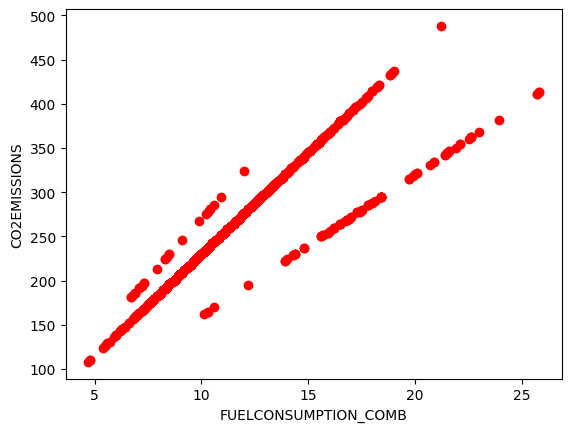

In [5]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color="red")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [6]:
msk = np.random.rand(len(df)) < 0.8

train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((861, 4), (206, 4))

In [7]:
x_train = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
y_train = np.asanyarray(train[["CO2EMISSIONS"]])

x_test = np.asanyarray(test[["FUELCONSUMPTION_COMB"]])
y_test = np.asanyarray(test[["CO2EMISSIONS"]])

x_train[:3]

array([[ 8.5],
       [ 9.6],
       [11.1]])

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [9]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

x_train_poly[:3]

array([[  1.  ,   8.5 ,  72.25],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,  11.1 , 123.21]])

In [10]:
mymodel = LinearRegression()
mymodel.fit(x_train_poly, y_train)

print(f"intercept : {mymodel.intercept_[0]} | coefficient : {mymodel.coef_[0][0]}, coefficient : {mymodel.coef_[0][1]}, coefficient : {mymodel.coef_[0][2]}")

intercept : -81.64269948745181 | coefficient : 0.0, coefficient : 40.80789877626136, coefficient : -0.9210089317362531


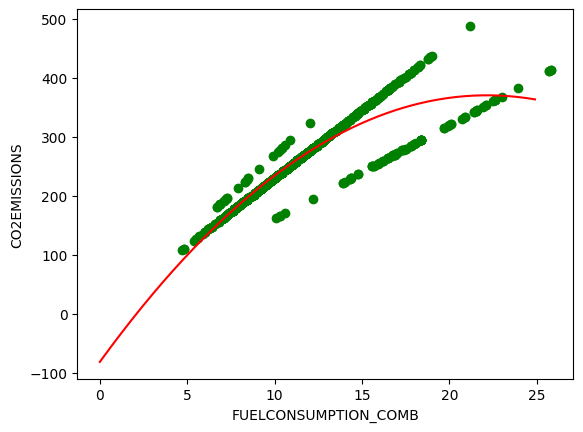

In [12]:
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"], color="green")
x = np.arange(0, 25, 0.1)
y = mymodel.intercept_[0] + mymodel.coef_[0][1] * x + mymodel.coef_[0][2] * np.pow(x, 2)
plt.plot(x, y, color="red")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

### model evaluation

In [13]:
from sklearn.metrics import r2_score

In [18]:
x_test_poly = poly.fit_transform(x_test)
y_test_pred = mymodel.predict(x_test_poly)

print(x_test[:3], "\n ------------------- \n", x_test_poly[:3])

[[ 5.9]
 [10.6]
 [ 9.8]] 
 ------------------- 
 [[  1.     5.9   34.81]
 [  1.    10.6  112.36]
 [  1.     9.8   96.04]]


In [19]:
mse = np.mean((y_test - y_test_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"mean squared error : {mse:.5f} | mean absolute error : {mae:.5f} | r2 score : {r2:.5f}".title().title())

Mean Squared Error : 601.63752 | Mean Absolute Error : 13.18224 | R2 Score : 0.85857
